In [1]:
from sportsref.baseball import Franchise
from sportsref.util import get_players_or_teams
import pandas as pd

In [2]:
teams = get_players_or_teams("baseball", "team")

In [3]:
abbrs = [
    'BOS','NYY','TBR','TOR','BAL',
    'DET','MIN','KCR','CLE','CHW',
    'HOU','LAA','OAK','TEX','SEA',
    'NYM','ATL','WSN','MIA','PHI',
    'CIN','CHC','PIT','MIL','STL',
    'LAD','SDP','SFG','COL','ARI'
]

In [4]:
def get_inn_splits(abbr, yr):
    print(abbr, yr)
    url=f"https://widgets.sports-reference.com/wg.fcgi?css=1&site=br&url=%2Fteams%2Fsplit.cgi%3Ft%3Dp%26team%3D{abbr}%26year%3D{yr}&div=div_innng"
    df = pd.read_html(url)[0]
    df['team'] = abbr
    df['year'] = yr
    return df

In [5]:
%%time
df = pd.concat([
    get_inn_splits(abbr, '2021') for abbr in abbrs
])

BOS 2021
NYY 2021
TBR 2021
TOR 2021
BAL 2021
DET 2021
MIN 2021
KCR 2021
CLE 2021
CHW 2021
HOU 2021
LAA 2021
OAK 2021
TEX 2021
SEA 2021
NYM 2021
ATL 2021
WSN 2021
MIA 2021
PHI 2021
CIN 2021
CHC 2021
PIT 2021
MIL 2021
STL 2021
LAD 2021
SDP 2021
SFG 2021
COL 2021
ARI 2021
CPU times: user 942 ms, sys: 49.1 ms, total: 991 ms
Wall time: 1.81 s


In [6]:
df

,Split,G,IP,ER,ERA,PA,AB,R,H,2B,...,HBP,SH,SF,IBB,ROE,BAbip,tOPS+,sOPS+,team,year
0,1st inning,132,132.0,65,4.43,580,518,68,142,41,...,8,1,3,0,2,0.344,115,114,BOS,2021
1,2nd inning,132,132.0,64,4.36,582,523,72,139,34,...,8,0,6,1,5,0.333,101,117,BOS,2021
2,3rd inning,132,132.0,51,3.48,540,500,56,117,20,...,5,1,2,0,6,0.305,66,73,BOS,2021
3,4th inning,132,132.0,67,4.57,569,513,70,142,30,...,6,2,5,1,1,0.342,106,109,BOS,2021
4,5th inning,132,132.0,73,4.98,562,508,76,130,32,...,4,1,2,1,7,0.308,102,107,BOS,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,9th inning,85,82.0,42,4.61,366,331,53,96,28,...,6,1,2,1,7,0.348,108,145,ARI,2021
9,Ext inning,12,14.2,6,3.68,73,59,20,16,7,...,2,1,1,7,0,0.319,108,109,ARI,2021
10,Innings 1-3,132,396.0,242,5.50,1747,1543,249,405,83,...,19,12,11,6,7,0.304,101,122,ARI,2021
11,Innings 4-6,132,396.0,184,4.18,1701,1505,201,368,88,...,24,16,9,11,11,0.276,83,99,ARI,2021


In [7]:
plot_df = df[df['Split'].str.contains('Innings')].pivot(index='team', columns='Split', values='R')
plot_df['Innings 1-6'] = plot_df['Innings 1-3'] + plot_df['Innings 4-6']
plot_df

Split,Innings 1-3,Innings 4-6,Innings 7-9,Innings 1-6
team,,,,
ARI,249,201,264,450
ATL,175,188,160,363
BAL,270,272,211,542
BOS,196,227,162,423
CHC,240,255,154,495
CHW,168,175,171,343
CIN,179,210,196,389
CLE,231,197,144,428
COL,220,205,182,425


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

In [9]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.07)

In [10]:
plt.xkcd()

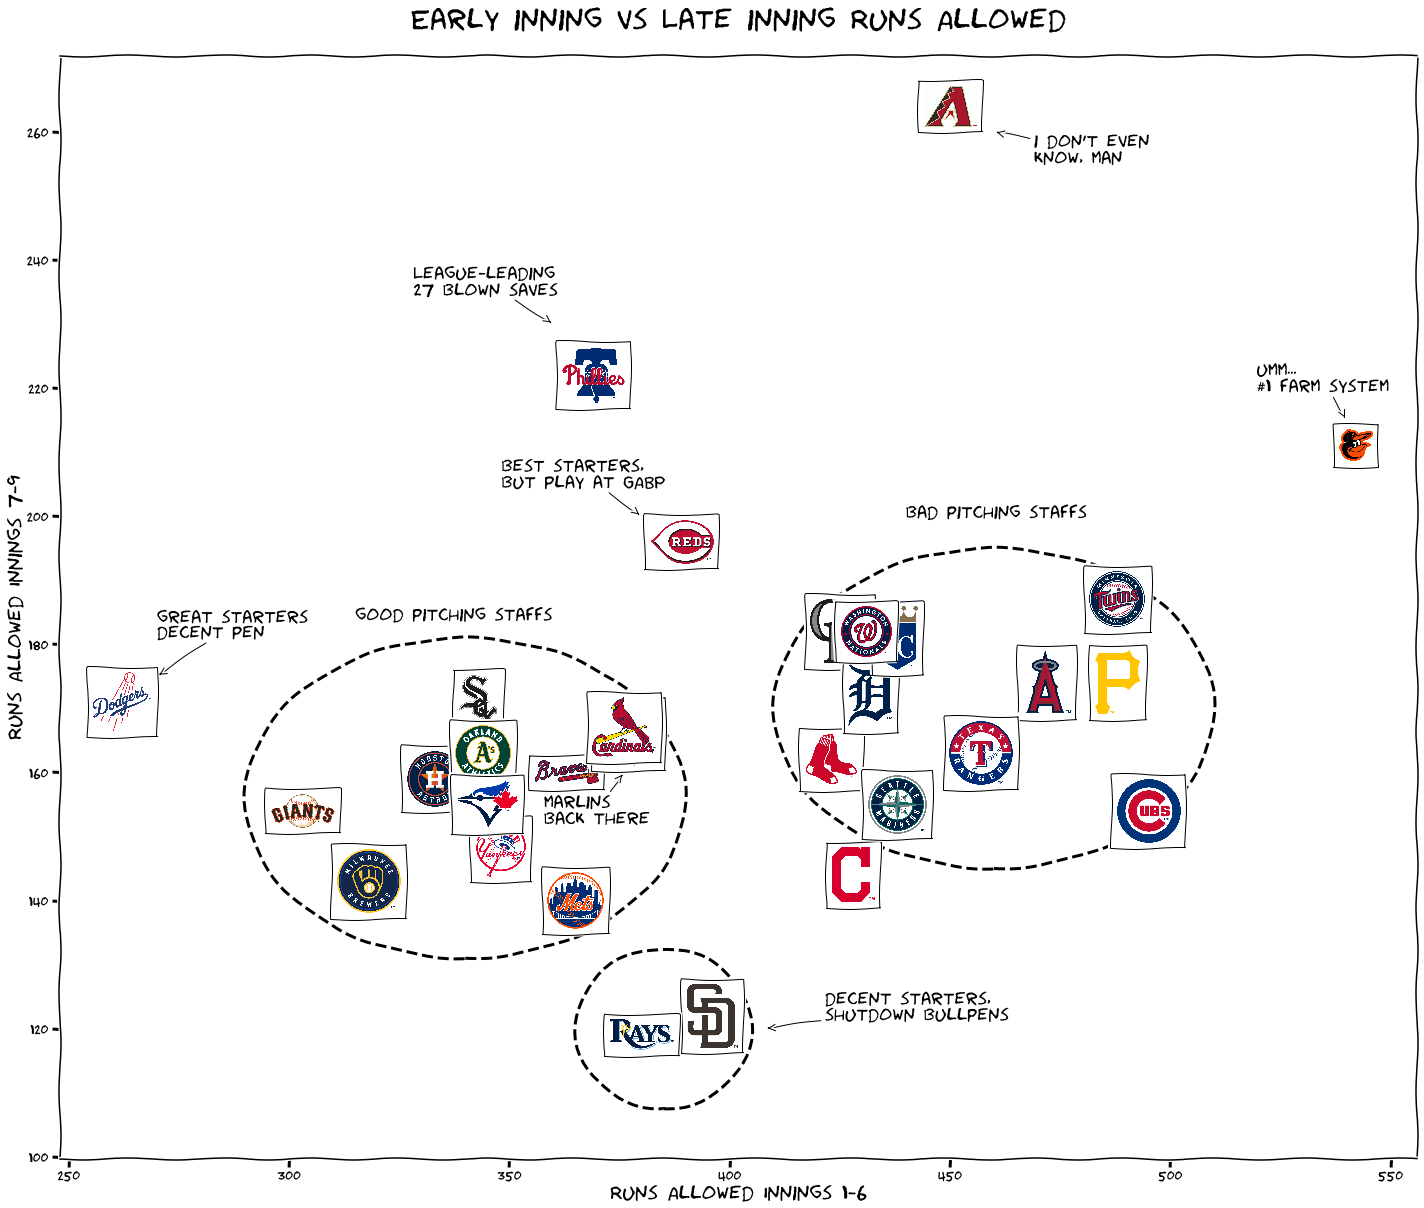

In [21]:
f, ax = plt.subplots(figsize=(20,17))

ax.scatter(plot_df['Innings 1-6'], plot_df['Innings 7-9'])

imgs = [
    ax.add_artist(
        AnnotationBbox(getImage(f'{tm.Index}.png'),
                      (tm._4, tm._3),
                       frameon=True
                      )
    )
    for tm in plot_df.itertuples()
]

#annotate shutdown bullpens
ax.add_patch(Ellipse(xy=(385,120), 
                     width=40, 
                     height=25, fill=False, ls="--", lw=3))

ax.annotate(
    "decent starters,\nshutdown bullpens",
    (408, 120),
    size=18,
    xytext = (60,10),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

#annotate good starters

ax.add_patch(Ellipse(xy=(340,156), 
                     width=100, 
                     height=50, fill=False, ls="--", lw=3))

ax.annotate(
    "good pitching staffs",
    (315, 184),
    size=18,
)

#annotate bad starters

ax.add_patch(Ellipse(xy=(460,170), 
                     width=100, 
                     height=50, fill=False, ls="--", lw=3))

ax.annotate(
    "bad pitching staffs",
    (440, 200),
    size=18,
)

#annotate dodgers
ax.annotate(
    "great starters\ndecent pen",
    (270, 175),
    size=18,
    xytext = (0,40),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

#annotate phillies
ax.annotate(
    "League-leading\n27 blown saves",
    (360, 230),
    size=18,
    xytext = (-140,30),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)
#annotate d-backs
ax.annotate(
    "i don't even\nknow, man",
    (460, 260),
    size=18,
    xytext = (40,-30),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)
#annotate orioles
ax.annotate(
    "umm...\n#1 farm system",
    (540, 215),
    size=18,
    xytext = (-90,30),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)
#annotate reds
ax.annotate(
    "best starters,\nbut play at GABP",
    (380, 200),
    size=18,
    xytext = (-140,30),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)
#annotate marlins
ax.annotate(
    "marlins\nback there",
    (376, 160),
    size=18,
    xytext = (-80,-50),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)


plt.xlabel('Runs Allowed Innings 1-6', size=20)
plt.ylabel('Runs Allowed Innings 7-9', size=20)
plt.title('Early inning vs Late inning Runs Allowed', pad=30, size=30)
plt.tight_layout()
plt.savefig('late_inning_runs_allowed.png')

In [12]:
# list(plot_df.itertuples())